# Exploration of GABA Receptors

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


importing IPython notebook from metaPCNA

importing IPython notebook from Imports

0.921417565485


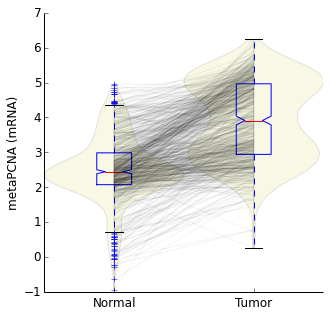

In [2]:
import NotebookImport
from metaPCNA import *

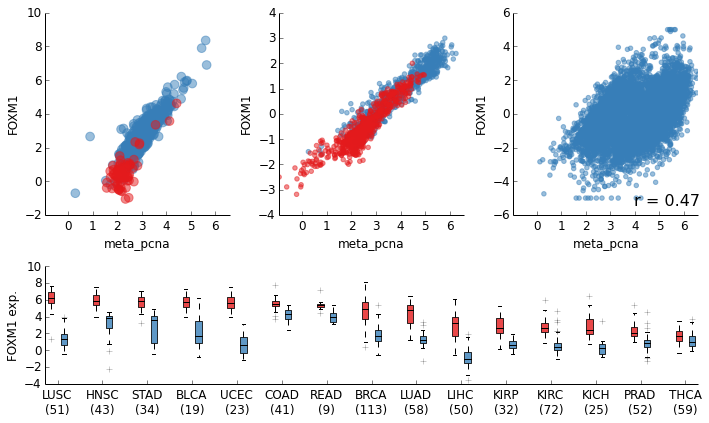

In [3]:
switch_plot('FOXM1')

GABRD is the top hit for tumor-associated, proliferation independent genes.

* Kidney cancer associated with hypertension [link](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3188386/) 
* GABA could have anti-hypertensive effects [link](https://kar.kent.ac.uk/46569/1/__gort_PYR_spk21_My%20Files_Reprints_JNURV2N2A5-Wildman-OA.pdf) 

In [4]:
f_win.order().tail()

LOC283914    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.47
SEMA5B       0.48
Name: fraction overexpressed\n(detrended), dtype: float64

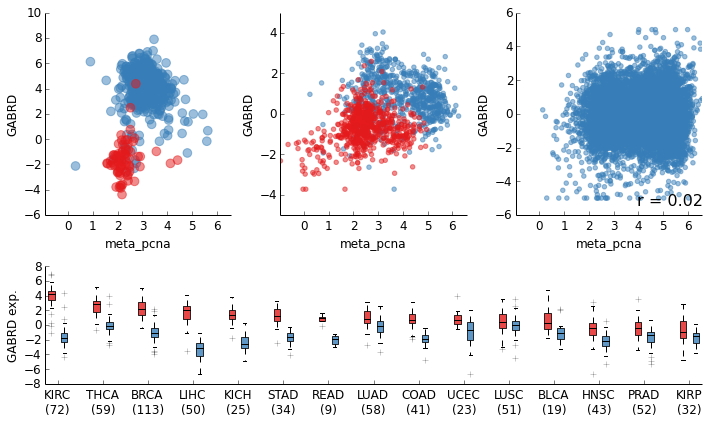

In [5]:
switch_plot('GABRD')

In [90]:
gabra = [g for g in rna_df.index if g.startswith('GABRA')]

In [91]:
gab_s = rna_df.ix[gabra].sum()

In [92]:
cc = codes[codes.isin(ti(codes.value_counts() > 50))]

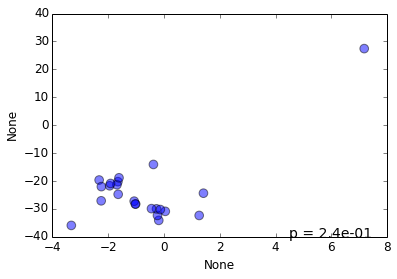

In [93]:
series_scatter(rna_df.ix['GABRD'][:,'11'].groupby(cc).mean(), 
                gab_s[:,'11'].groupby(cc).mean())

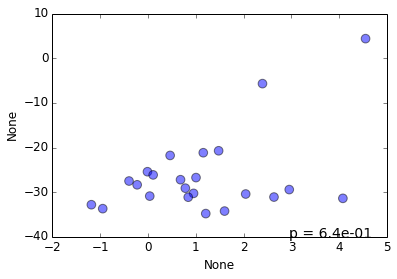

In [94]:
series_scatter(rna_df.ix['GABRD'][:,'01'].groupby(cc).mean(), 
                gab_s[:,'01'].groupby(cc).mean())

In [5]:
gabr = [g for g in rna_df.index if g.startswith('GABR')]
f = dx_rna.ix[gabr].dropna()
f.join(f_win).sort(f_win.name)

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
GABRA2,141,654,0.22,1.59e-50,-0.31
GABRA4,145,645,0.22,1.39e-46,-0.27
GABRB1,201,629,0.32,8.11e-20,-0.16
GABRP,248,684,0.36,6.25e-13,-0.15
GABRB3,218,684,0.32,1.29e-21,-0.12
GABRG1,189,635,0.30,6.76e-25,-0.12
GABRG3,273,632,0.43,7.10e-04,-0.12
GABRA3,333,602,0.55,1.02e-02,-0.10
GABRA5,281,617,0.46,2.96e-02,-0.09
GABRB2,245,678,0.36,4.92e-13,-0.06


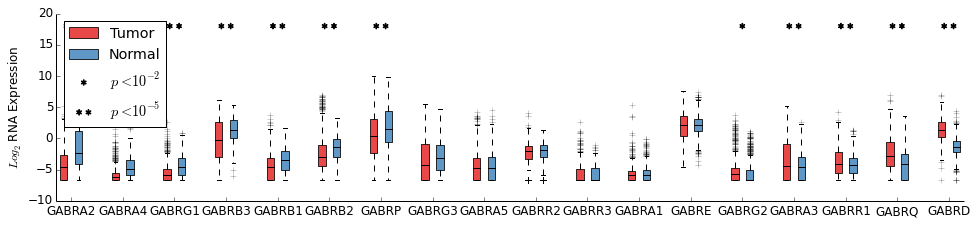

In [96]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr].clip(-9,10).T, 
                            order=list(f.frac.order().index))
prettify_ax(plt.gca())

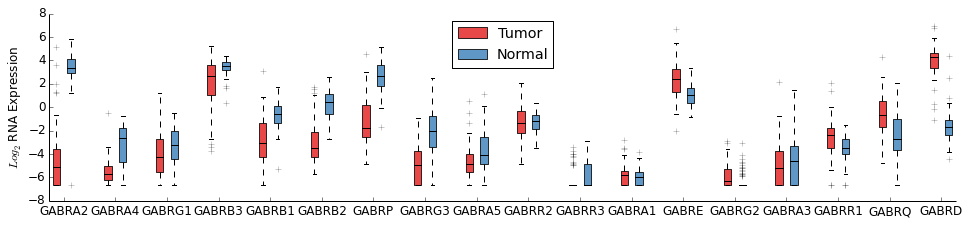

In [97]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=list(f.frac.order().index), sig=False)
prettify_ax(plt.gca())

In [3]:
o = ['GABRA1','GABRA2', 'GABRA3', 'GABRA4', 'GABRA5',
     'GABRB1', 'GABRB2', 'GABRB3',
     'GABRR1', 'GABRR2', 'GABRR3',
     'GABRD','GABRE','GABRP','GABRQ']

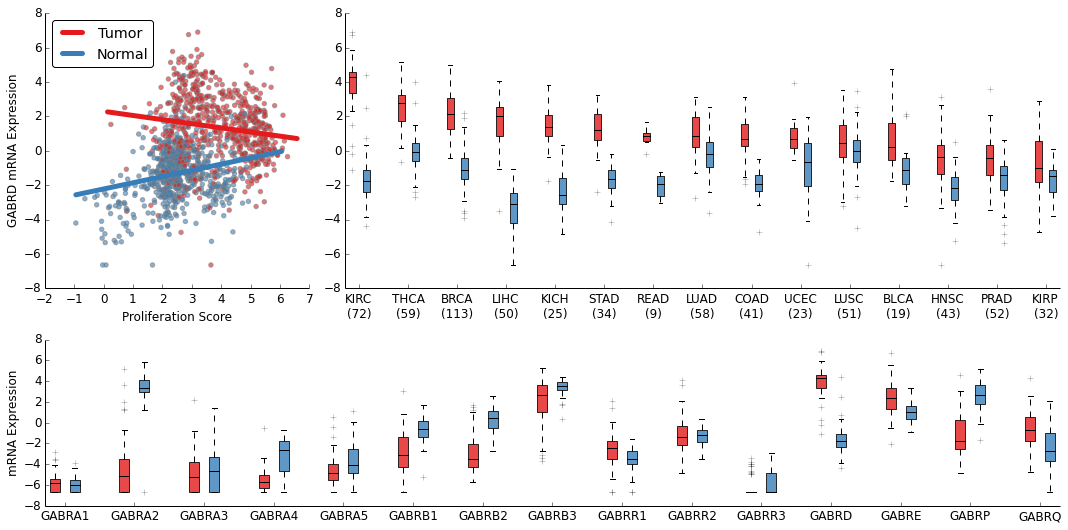

In [38]:
fig = plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot2grid((5, 7), (0, 0), colspan=2, rowspan=3)
ax2 = plt.subplot2grid((5, 7), (0, 2), colspan=5, rowspan=3)
ax3 = plt.subplot2grid((5, 7), (3, 0), colspan=7, rowspan=2)

ax = ax1
cc = pd.Series(matched_tn.columns.get_level_values(1), 
               matched_tn.columns).map({'01': colors[0],
                                        '11': colors[1]})
series_scatter(meta_pcna_all, matched_tn.ix['GABRD'], zorder=1,
               ax=ax, ann=None, s=20, edgecolor='grey', linewidths=1,
               alpha=.6, color=cc)

line_args = {'lw':5, 'solid_capstyle':'round'}
l1, l2 = process_line_args(line_args)
x,y = meta_pcna_all[:,'01'], matched_tn.ix['GABRD'][:,'01']
reg = linear_regression(x,y)
line_me(reg['slope'], reg['intercept'], start=x.min(), end=x.max(),
            ax=ax, **l1)

x,y = meta_pcna_all[:,'11'], matched_tn.ix['GABRD'][:,'11']
reg = linear_regression(x,y)
line_me(reg['slope'], reg['intercept'], start=x.min(), end=x.max(),
            ax=ax, **l1)

ax1.legend(['Tumor','Normal'], loc='upper left', scatterpoints=1, markerscale=1.5,
          fancybox=True)
ax1.set_xlabel('Proliferation Score')
prettify_ax(ax1)

paired_bp_tn_split(matched_rna.ix['GABRD'], codes, ax=ax2)
ax2.set_ylabel('')
ax1.set_ylabel('GABRD mRNA Expression')

paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=o, sig=False, ax=ax3)
prettify_ax(ax3)
ax3.get_legend().set_visible(False)
ax3.set_ylabel('mRNA Expression')
fig.tight_layout()
fig.savefig('/cellar/users/agross/Desktop/Figures/GABA_F4.pdf')

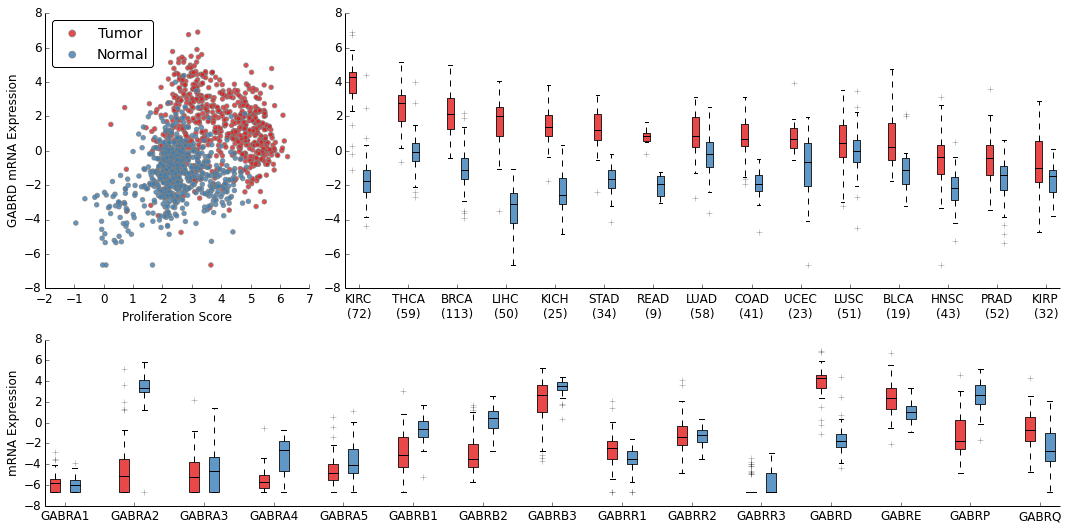

In [6]:
fig = plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot2grid((5, 7), (0, 0), colspan=2, rowspan=3)
ax2 = plt.subplot2grid((5, 7), (0, 2), colspan=5, rowspan=3)
ax3 = plt.subplot2grid((5, 7), (3, 0), colspan=7, rowspan=2)

series_scatter(meta_pcna_all[:,'01'], matched_tn.ix['GABRD'][:,'01'], ax=ax1,
               ann=None, s=20, edgecolor='grey', linewidths=1, 
               alpha=.8, color=colors[0])
series_scatter(meta_pcna_all[:,'11'], matched_tn.ix['GABRD'][:,'11'], 
               ax=ax1, ann=None, s=20, edgecolor='grey', linewidths=1,
               alpha=.8, color=colors[1])
ax1.legend(['Tumor','Normal'], loc='upper left', scatterpoints=1, markerscale=1.5,
          fancybox=True)
ax1.set_xlabel('Proliferation Score')
prettify_ax(ax1)

paired_bp_tn_split(matched_rna.ix['GABRD'], codes, ax=ax2)
ax2.set_ylabel('')
ax1.set_ylabel('GABRD mRNA Expression')

paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=o, sig=False, ax=ax3)
prettify_ax(ax3)
ax3.get_legend().set_visible(False)
ax3.set_ylabel('mRNA Expression')
fig.tight_layout()
fig.savefig('/cellar/users/agross/Desktop/Figures/GABA_F4.pdf')

In [123]:
cc = codes.ix[matched_tn.columns.get_level_values(0)].value_counts()
cc

BRCA    224
KIRC    144
THCA    118
LUAD    116
PRAD    104
LUSC    102
LIHC    100
HNSC     86
COAD     82
KIRP     64
KICH     50
UCEC     46
BLCA     38
READ     18
CESC      6
dtype: int64

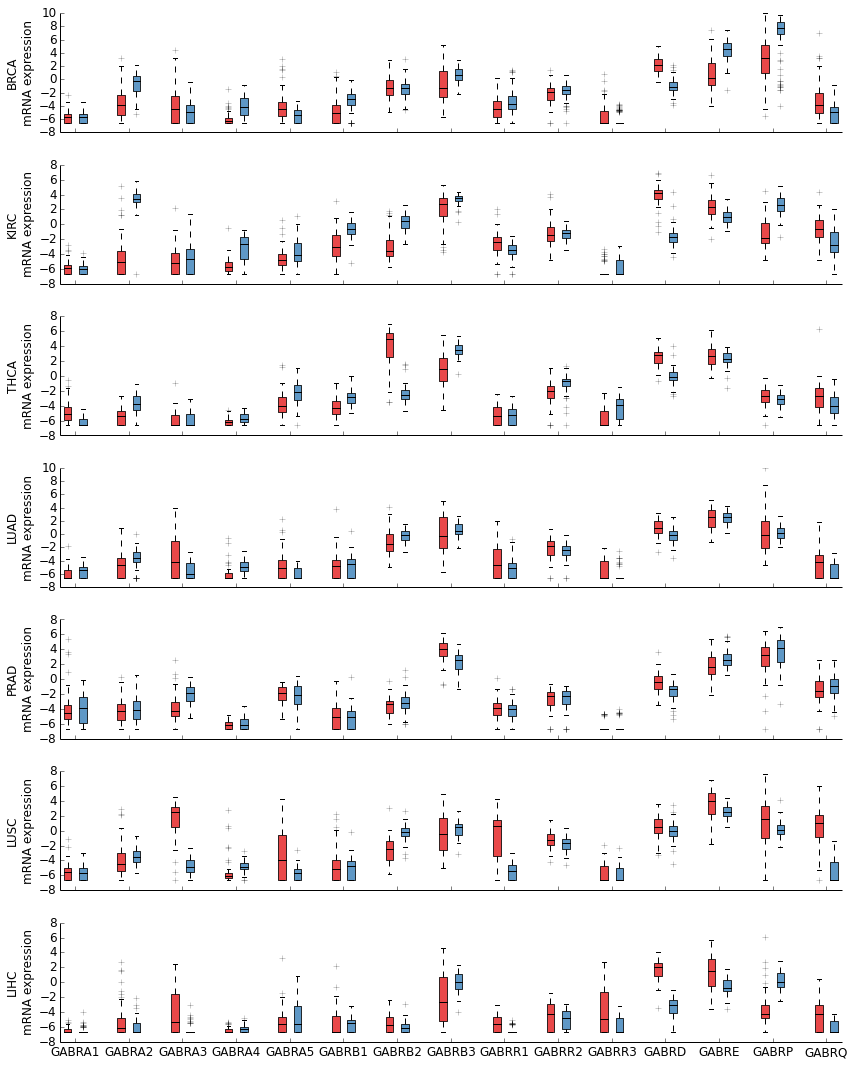

In [141]:
fig, axs = subplots(7,1, figsize=(12,15), sharex=True)
letters = list(map(chr, range(97, 123)))
for i,c in enumerate(ti(cc > 99)):
    paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes == c)].clip(-9,10).T, 
                                order=o, sig=False, ax=axs[i])
    axs[i].set_ylabel(c + '\nmRNA expression')
for ax in axs:
    prettify_ax(ax)
    ax.get_legend().set_visible(False)
    prettify_ax(ax)
fig.tight_layout()

In [ ]:
fig, axs = subplots(8, 1, figsize=(8.5,11), sharex=True)
letters = list(map(chr, range(97, 123)))
o = rna_df.ix[f].sum()[:,'11'].groupby(codes).mean().order().index[::-1]
for i,g in enumerate(sorted(f)):
    paired_bp_tn_split(matched_rna.ix[g], codes, ax=axs[i], data_type='',
                       order=o)
    axs[i].set_ybound(-7,12)
    #axs[i].text(-0.05, 1.15, letters[i], transform=axs[i].transAxes,
    #        fontsize=18, fontweight='bold', va='top', ha='right')
fig.tight_layout()